# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 1 | nuku'alofa
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | baiyin
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | dubbo
Processing Record 9 of Set 1 | zhanaozen
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | christchurch
Processing Record 13 of Set 1 | severo-yeniseyskiy
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | nova sintra
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | salinopolis
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | atafu village
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,1.63,77,26,4.14,GS,1702337452
1,nuku'alofa,-21.1333,-175.2000,29.19,58,20,5.14,TO,1702337453
2,hermanus,-34.4187,19.2345,16.52,83,75,4.79,ZA,1702337453
3,baiyin,36.5583,104.2081,-2.07,50,0,0.66,CN,1702337454
4,yellowknife,62.4560,-114.3525,-25.71,76,20,1.03,CA,1702337454


In [24]:
# Export the City_Data into a csv
import os 
#directory_path = 'output_data'
#print("Full File Path:", os.path.join(directory_path, 'cities.csv'))
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
#print("current working directory:",os.getcwd())

current working directory: c:\Users\Trina\OneDrive\Documents\BootCamp\6 module\starter_code\WeatherPy


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.63,77,26,4.14,GS,1702337452
1,nuku'alofa,-21.1333,-175.2000,29.19,58,20,5.14,TO,1702337453
2,hermanus,-34.4187,19.2345,16.52,83,75,4.79,ZA,1702337453
3,baiyin,36.5583,104.2081,-2.07,50,0,0.66,CN,1702337454
4,yellowknife,62.4560,-114.3525,-25.71,76,20,1.03,CA,1702337454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

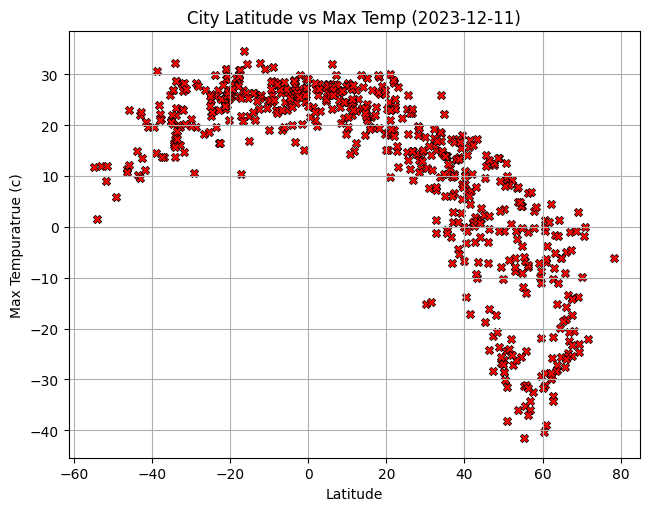

In [27]:
# Build scatter plot for latitude vs. temperature
def build_scatter(x,y):
    plt.scatter(city_data_df[x],city_data_df[y],c='red',marker="X",edgecolors='black',linewidths=0.5)
    plt.tight_layout()
    plt.grid()

build_scatter("Lat","Max Temp")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Tempuratrue (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

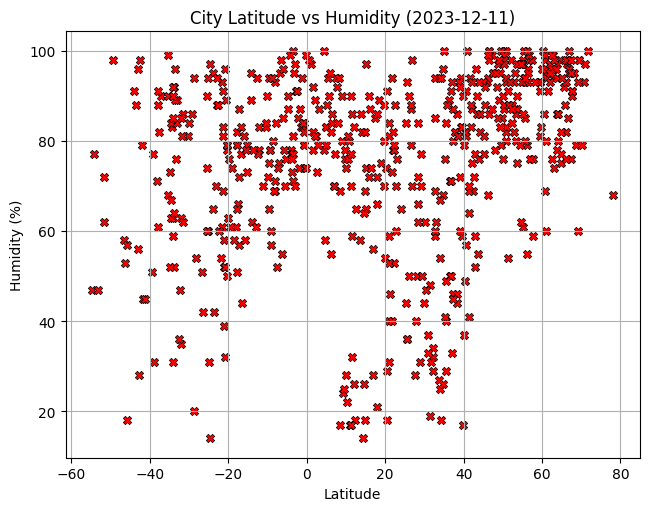

In [9]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat","Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

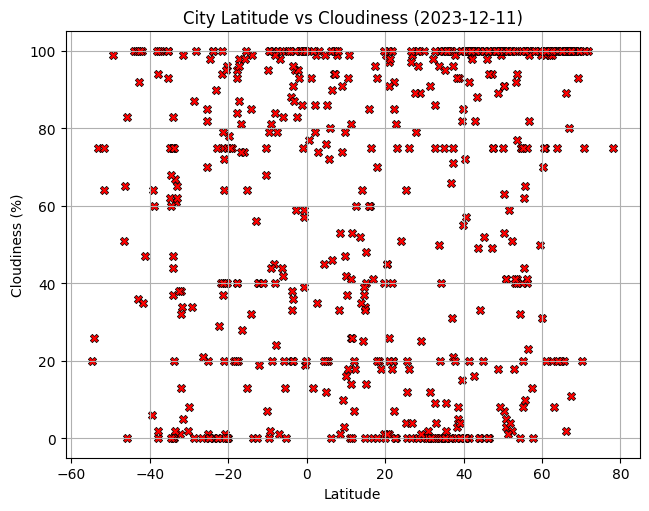

In [10]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

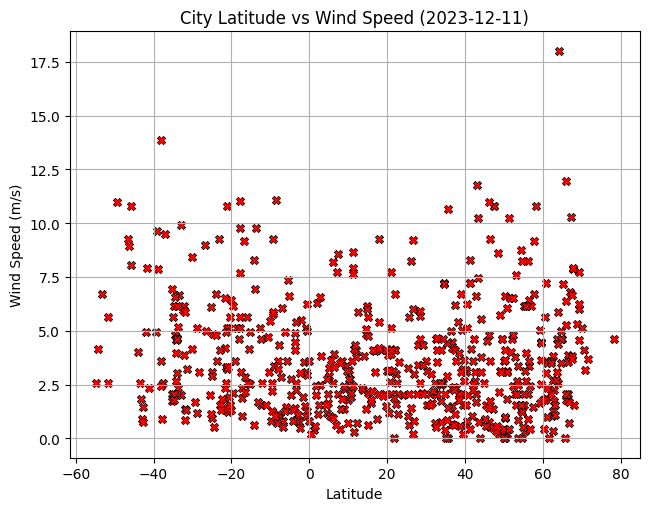

In [11]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,baiyin,36.5583,104.2081,-2.07,50,0,0.66,CN,1702337454
4,yellowknife,62.4560,-114.3525,-25.71,76,20,1.03,CA,1702337454
5,ilulissat,69.2167,-51.1000,3.01,60,100,7.72,GL,1702337454
7,zhanaozen,43.3000,52.8000,-9.96,90,88,10.22,KZ,1702337455
11,severo-yeniseyskiy,60.3725,93.0408,-40.24,100,70,0.45,RU,1702337456


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,1.63,77,26,4.14,GS,1702337452
1,nuku'alofa,-21.1333,-175.2000,29.19,58,20,5.14,TO,1702337453
2,hermanus,-34.4187,19.2345,16.52,83,75,4.79,ZA,1702337453
6,dubbo,-32.2500,148.6167,28.07,47,1,6.17,AU,1702337454
8,invercargill,-46.4000,168.3500,11.42,53,65,8.93,NZ,1702337455


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8116848026416215


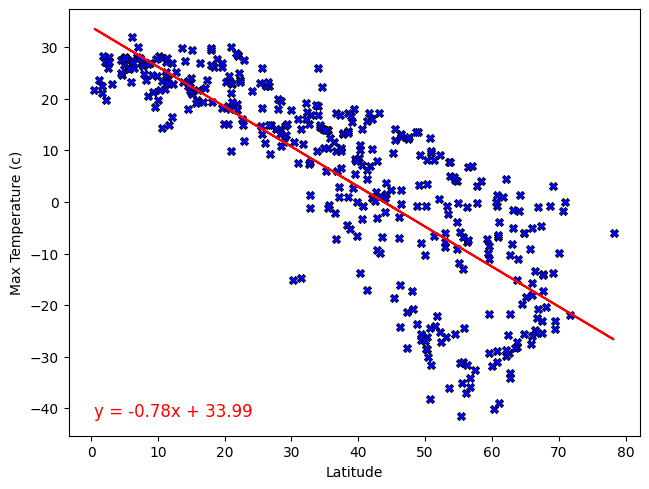

In [15]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.5649232476468848


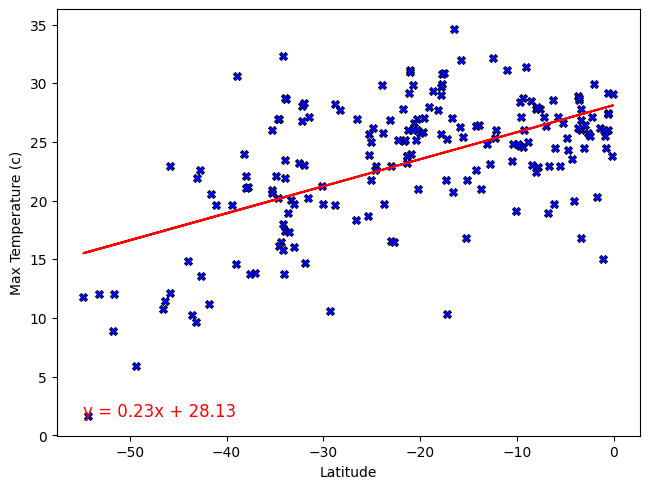

In [16]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3870653205016238


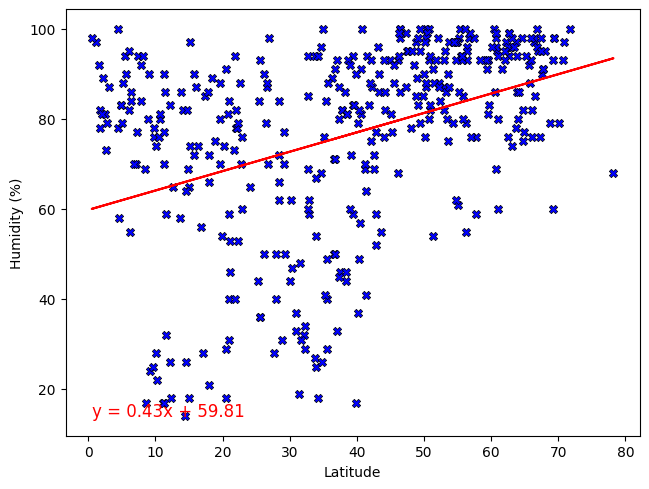

In [17]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.27962417177360493


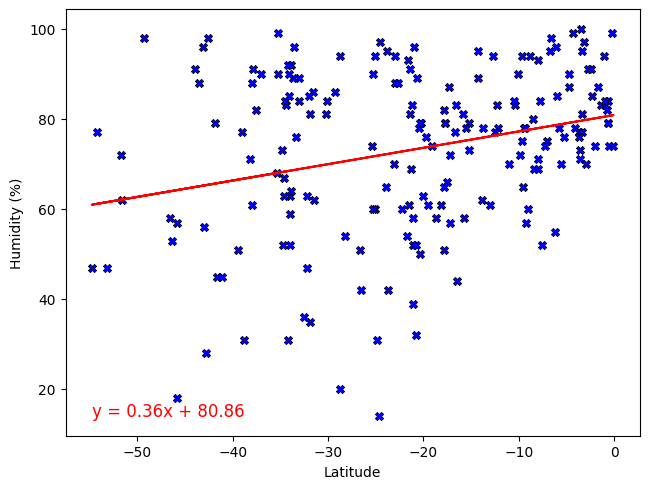

In [18]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26795797999194326


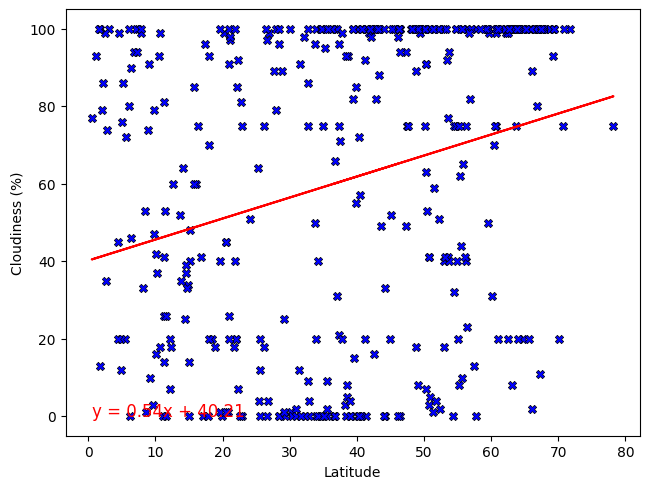

In [19]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.08464737305474135


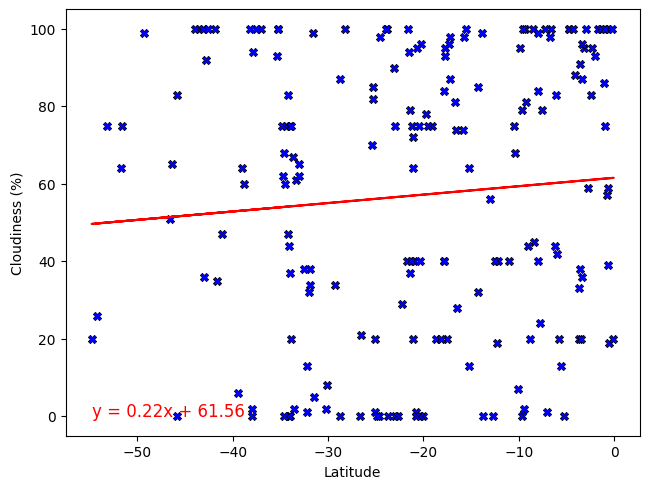

In [20]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** Similar to humidity ther is little correlation between Cloudiness and latitude. The scatter plots show that northern hemisphere have more cloudiness above 60%

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12734091083970772


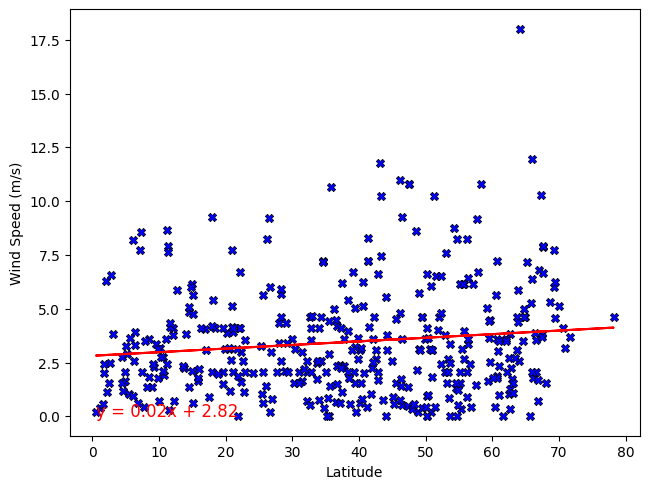

In [21]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.2429731402299821


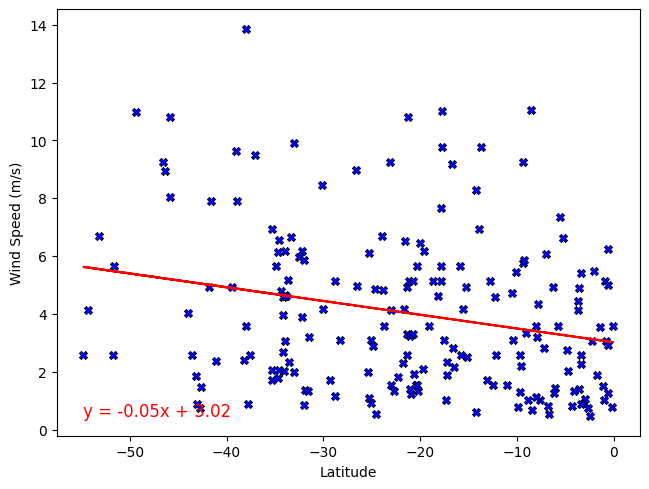

In [22]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** corelation in the southern hemisphere is very little as well as Northern Hemisphere. 